In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

seasons = ['1112','1213','1314','1415','1516','1617','1718']
columns = ['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']
df = pd.DataFrame(columns=columns)
for season in seasons:
    df_ = pd.read_csv("http://www.football-data.co.uk/mmz4281/" + season + "/I1.csv",
                     parse_dates=['Date'], dayfirst=True)
    df_.dropna(how='all', inplace=True) # removes empty rows (and columns)
    df_['Season'] = season
    df_ = df_[['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
    df = df.append(df_).reset_index(drop=True)

df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1112,2011-09-09,Milan,Lazio,2,2,D
1,1112,2011-09-10,Cesena,Napoli,1,3,A
2,1112,2011-09-11,Catania,Siena,0,0,D
3,1112,2011-09-11,Chievo,Novara,2,2,D
4,1112,2011-09-11,Fiorentina,Bologna,2,0,H


In [309]:
df.groupby(['Season']).size()

Season
1112    380
1213    380
1314    380
1415    380
1516    380
1617    380
1718    380
dtype: int64

In [310]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([df[['Season','HomeTeam','AwayTeam','FTHG']].assign(
        home=1).rename(columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'FTHG':'goals'}),
                             df[['Season','AwayTeam','HomeTeam','FTAG']].assign(
        home=-1).rename(columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'FTAG':'goals'})])
goal_model_data = goal_model_data[
    goal_model_data['Season'].isin(['1112','1213','1314','1415','1516'])]
goal_model_data['goals'] = goal_model_data['goals'].astype(int)


poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 3800
Model:                            GLM   Df Residuals:                     3742
Model Family:                 Poisson   Df Model:                           57
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5374.9
Date:                Fri, 04 Jan 2019   Deviance:                       4151.9
Time:                        18:24:45   Pearson chi2:                 3.56e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0569      0.095      0.596      0.551      -0.130       0.244
team[T.Bologna]           -0.0901      0.108     -0.832      0.406      -0.302       0.122
team[T.Cagliari]           0.0077      0.106      0.073      0.942      -0.199       0.215
team[T.Carpi]             -0.0829      0.179     -0.462      0.644      -0.434       0.268
team[T.Catania]            0.0816      0.112      0.726      0.468      -0.139       0.302
team[T.Cesena]            -0.2805      0.147     -1.905      0.057      -0.569       0.008
team[T.Chievo]            -0.1359      0.103     -1.319      0.187      -0.338       0.066
team[T.Empoli]             0.0628      0.129      0.487      0.626      -0.190       0.316
team[T.Fiorentina]         0.3723      0.091      4.072      0.000       0.193       0.552
team[T.Frosinone]         -0.1186      0.183     -0.647      0.518      -0.478       0.241
team[T.Genoa]              0.1585      0.096      1.651      0.099      -0.030       0.347
team[T.Inter]              0.3380      0.092      3.668      0.000       0.157       0.519
team[T.Juventus]           0.5658      0.088      6.448      0.000       0.394       0.738
team[T.Lazio]              0.3372      0.092      3.659      0.000       0.157       0.518
team[T.Lecce]             -0.0042      0.173     -0.024      0.980      -0.344       0.336
team[T.Livorno]           -0.0105      0.175     -0.060      0.952      -0.354       0.333
team[T.Milan]              0.3981      0.091      4.377      0.000       0.220       0.576
team[T.Napoli]             0.5861      0.088      6.678      0.000       0.414       0.758
team[T.Novara]            -0.1284      0.183     -0.700      0.484      -0.488       0.231
team[T.Palermo]            0.1005      0.103      0.975      0.330      -0.102       0.303
team[T.Parma]              0.1670      0.101      1.650      0.099      -0.031       0.365
team[T.Pescara]           -0.3677      0.205     -1.793      0.073      -0.770       0.034
team[T.Roma]               0.5122      0.089      5.758      0.000       0.338       0.687
team[T.Sampdoria]          0.1497      0.102      1.473      0.141      -0.050       0.349
team[T.Sassuolo]           0.1571      0.110      1.429      0.153      -0.058       0.373
team[T.Siena]              0.0032      0.132      0.025      0.980      -0.255       0.262
team[T.Torino]             0.2335      0.099      2.349      0.019       0.039       0.428
team[T.Udinese]            0.1515      0.096      1.577      0.115      -0.037       0.340
team[T.Verona]             0.1946      0.109      1.784      0.074      -0.019       0.408
opponent[T.Bologna]       -0.0260      0.095     -0.274      0.784      -0.212       0.160
opponent[T.Cagliari]       0.0900      0.092      0.978      0.328      -0.090       0.270
opponent[T.Carpi]          0.1072      0.147      0.730      0.466  

In [311]:
teams_drop = list(set(df['HomeTeam'].loc[df['Season'].isin(
            ['1617','1718'])]) - 
                  set(df['HomeTeam'].loc[df['Season'].isin(
            ['1112','1213','1314','1415','1516'])]))

df_test = df[(df['Season'].isin(['1617','1718'])) 
                     & (~df['HomeTeam'].isin(teams_drop))
                     & (~df['AwayTeam'].isin(teams_drop))].reset_index(drop=True)

def create_obs_matrix(data):
    home_goals = data['FTHG']
    away_goals = data['FTAG']
    coords = np.column_stack((home_goals, away_goals))
    obs_matrix = np.zeros([10,10])
    for i in range(coords.shape[0]):
        obs_matrix[coords[i,0],coords[i,1]] += 1
    return obs_matrix

obs_matrix = create_obs_matrix(df_test)

In [312]:
df_test['lambda_'] = poisson_model.predict(df_test[['Season','HomeTeam','AwayTeam','FTHG']].assign(
        home=1).rename(columns={'HomeTeam':'team', 'AwayTeam':'opponent'}))
df_test['mu'] = poisson_model.predict(df_test[['Season','HomeTeam','AwayTeam','FTHG']].assign(
        home=-1).rename(columns={'HomeTeam':'opponent', 'AwayTeam':'team'}))

def pred_matrix_one_game(data, homeTeam, awayTeam, max_goals=9):
    
    home_goals_avg = data.loc[(data['HomeTeam'] == homeTeam) & (data['AwayTeam'] == awayTeam)]['lambda_'].values[0]
    away_goals_avg = data.loc[(data['HomeTeam'] == homeTeam) & (data['AwayTeam'] == awayTeam)]['mu'].values[0]

    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

def pred_matrix_all_games(data):
    pred_matrix = np.zeros([10,10])
    for i in range(data.shape[0]):
        add_matrix = pred_matrix_one_game(data, data['HomeTeam'][i], data['AwayTeam'][i], max_goals=9)
        pred_matrix += add_matrix
    return pred_matrix

pred_matrix = pred_matrix_all_games(df_test)

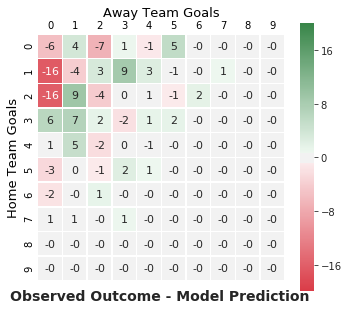

In [313]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))  
with sns.axes_style("white"):
    ax = sns.heatmap(obs_matrix-pred_matrix, annot=True, fmt='.0f', cmap=cmap, vmin=-20, vmax=20, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.1, 'Observed Outcome - Model Prediction', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()


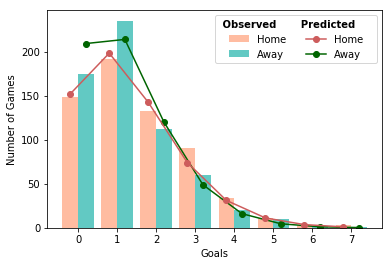

In [314]:
bars = 8
ind = np.arange(bars) # the x locations for the bars
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

# plot bar chart of observed goals
rects1 = ax.bar(ind, np.sum(obs_matrix, axis=1)[:8], width, color='#FFA07A', alpha=0.7)
rects2 = ax.bar(ind + width, np.sum(obs_matrix, axis=0)[:8], width, color='#20B2AA', alpha=0.7)

# add lines for model predictions
line1 = ax.plot([i-0.6 for i in range(1,9)], np.sum(pred_matrix, axis=0)[:8],
                  linestyle='-', marker='o',label="Home", color = '#006400')
line2 = ax.plot([i-1 for i in range(1,9)], np.sum(pred_matrix, axis=1)[:8],
                  linestyle='-', marker='o',label="Away", color = '#CD5C5C')

ax.set_ylabel('Number of Games')
ax.set_xlabel('Goals')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('0','1','2','3','4','5','6','7'))

leg = ax.legend((rects1[0], rects2[0], line2[0], line1[0])
                , ('Home', 'Away', 'Home', 'Away'), ncol=2)
leg.set_title(" Observed       Predicted     ", prop = {'size':'10', 'weight':'bold'})

plt.show()

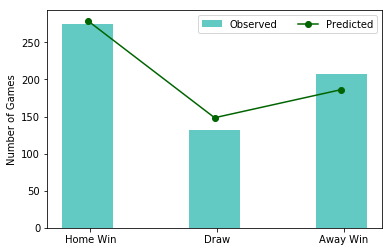

In [315]:
obs_result = np.array([np.sum(np.tril(obs_matrix,-1)), 
                       np.sum(np.diag(obs_matrix)), 
                       np.sum(np.triu(obs_matrix,1))])

pred_result = np.array([np.sum(np.tril(pred_matrix,-1)), 
                        np.sum(np.diag(pred_matrix)), 
                        np.sum(np.triu(pred_matrix,1))])


bars = 3
ind = np.arange(bars) # the x locations for the bars
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

# plot bar chart of observed results
rects1 = ax.bar(ind, obs_result, width, color='#20B2AA', alpha=0.7)

# add lines for model predictions
line1 = ax.plot([i-1 for i in range(1,4)], pred_result,
                  linestyle='-', marker='o',label="Home", color = '#006400')


ax.set_ylabel('Number of Games')
ax.set_xticks(ind + width / 20)
ax.set_xticklabels(('Home Win','Draw','Away Win'))

leg = ax.legend((rects1[0], line1[0]), ('Observed', 'Predicted'), ncol=2)

plt.show()

In [316]:
def prediction_probabilities(data, pred_matrix):
    pp = np.zeros([data.shape[0],3]) # 3 outcomes (home, draw, away)
    for i in range(data.shape[0]):
        pred_matrix = pred_matrix_one_game(data, data['HomeTeam'].loc[i], data['AwayTeam'].loc[i], max_goals=9)
        pp[i,0] = np.sum(np.tril(pred_matrix,-1)) # home win
        pp[i,1] = np.sum(np.diag(pred_matrix)) # draw
        pp[i,2] = np.sum(np.triu(pred_matrix,1)) # away win
    return pp


def ranked_probability_score(predictions, observed):
    observed = observed.where(observed != 'H', 0).where(observed != 'D', 1).where(observed != 'A', 2)

    num_outcomes = predictions.shape[1] # 3 outcomes: home win, draw, away win
    num_predictions = predictions.shape[0] # number of matches in test set

    rps = np.zeros(num_predictions)
    for i in range(num_predictions):
        obs_lookup = np.zeros(num_outcomes)
        obs_lookup[observed[i]] = 1 # mark the observed result in the row vector (1,0,0) = home win
        sigma_i = 0
        for j in range(num_outcomes):
            sigma_j = (np.sum(predictions[i,0:j]) - np.sum(obs_lookup[0:j]))**2
            sigma_i += sigma_j
        rps[i] = (1/(num_outcomes-1))*sigma_i

    return rps

pp = prediction_probabilities(data=df_test, pred_matrix=pred_matrix)
rps = ranked_probability_score(predictions=pp, observed=df_test['FTR'])

np.mean(rps)

0.19516117831662935

In [317]:
df_test['RPS'] = rps

df_test['RPS'].groupby(df_test['Season']).mean()

Season
1617    0.191143
1718    0.200213
Name: RPS, dtype: float64

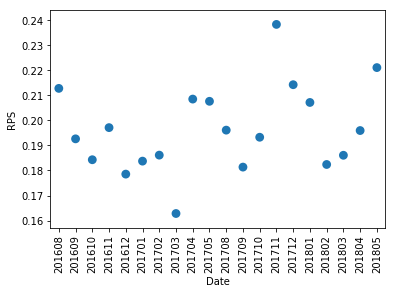

In [362]:
df_test['RPS'] = rps

df_test['RPS'].groupby(df_test['Date'].map(lambda x: 100*x.year + x.month)).mean(
                ).reset_index().sort_values(by=['Date'])['Date'].astype(str)


ax = sns.pointplot(
    x=df_test['RPS'].groupby(df_test['Date'].map(lambda x: 100*x.year + x.month)).mean(
                ).reset_index().sort_values(by=['Date'])['Date'].astype(str), 
    y=df_test['RPS'].groupby(df_test['Date'].map(lambda x: 100*x.year + x.month)).mean(
                ).reset_index().sort_values(by=['Date'])['RPS'],
    join=False, 
    )
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()